# 活性化関数であるsigmoid関数とsoftmax関数をpythonで実装する

i. Sigmoid関数は次の課題でそのまま使用するので、Numpyを入力とする。

定義後、他の課題で再利用するため、`act_funcs.py`ファイルと名付け、カレントディレクトリのpythonファイルからは`import act_funcs`で使用できるようにしました。

function : sigmoid


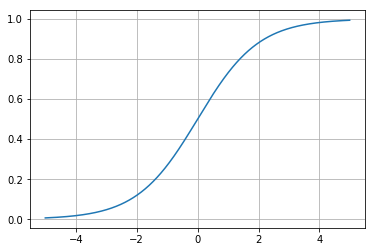

function : relu


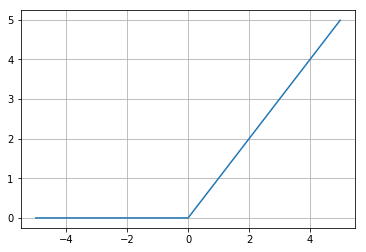

function : identity_function


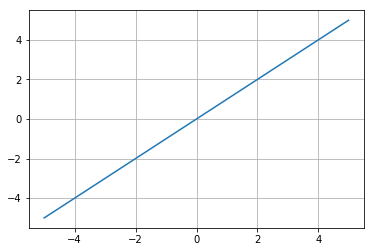

function : softmax


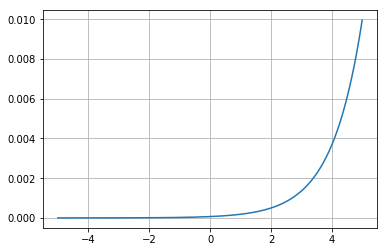

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):
    return x

def softmax(a):
    exp_a = np.exp(a - max(a))
    return exp_a/np.sum(exp_a)

if __name__=="__main__":
    %matplotlib inline
    import matplotlib.pyplot as plt
    x = np.arange(-5,5,0.01)
    for n, f in (("sigmoid", sigmoid)
                 ,("relu", relu)
                 ,("identity_function", identity_function)
                 ,("softmax", softmax)):
        print("function :", n)
        plt.grid()
        plt.plot(x, f(x))
        plt.show()

# 3層マルチパーセプトロンによるNNの実装を行い、出力が正しいか確認する

活性化関数にはSigmoid関数を使用する

ネットワークが3層とは限らないので、ネットワークに層の情報を保存させ、繰り返し処理をさせるように実装しました。
[赤本](https://www.oreilly.co.jp/books/9784873117584/)の`.pkl`ファイルをそのまま使用することはできなくなりましたが、読み込んだものから改めてディクショナリを作ることで対処することとしました。

In [2]:
import numpy as np
from act_funcs import sigmoid, identity_function

def init_network():
    network = {}
    network["layer_num"] = 3 # 層の数
    network["B"] = np.array([[0.1, 0.2, 0.3]
                            ,[0.1, 0.2]
                            ,[0.1, 0.2]
    ])

    network["W"] = np.array([
        [[0.1, 0.3, 0.5]
        ,[0.2, 0.4, 0.6]]

        ,
        [[0.1, 0.4]
        ,[0.2, 0.5]
        ,[0.3, 0.6]]

        ,
        [[0.1, 0.3]
        ,[0.2, 0.4]]
    ])

    return network

def _forward(n,i):
    a = np.dot(n["X"],n["W"][i]) + n["B"][i]
    n["X"] = sigmoid(a)
    i += 1
    if i < n["layer_num"]:
        return _forward(n,i)
    else:
        return identity_function(a)

def forward(n, x):
    n["X"] = x
    return _forward(n, 0)

def main():
    print(forward(init_network(), np.array([1.0, 0.5])))

if __name__=="__main__":
    main()

[0.31682708 0.69627909]


# バッチ処理の行い方についてサンプルコードを実行し、扱い方のイメージを掴む

複数の入力を逐次的に処理する

[ここまでの演習で実装したコード](#3層マルチパーセプトロンによるNNの実装を行い、出力が正しいか確認する)を使用し、実際にどのように処理が走っているかを以下のコードで確認しました。(とても長い出力ですので、以下出力部分はここではコメントアウトしています。リダイレクトで中身を保存して確認しました。)

In [6]:
import numpy as np
import prac_3_4_2 as neuron

network = neuron.init_network()
batch_size = 16
x=np.random.rand(1024,2)

for i in range(0,len(x),batch_size):
    # print("===batch", i//16+1, "start===\n")
    x_batch = x[i:i+batch_size]
    y_batch = neuron.forward(network,x_batch)
    # print("x :", x_batch, "\ny :", y_batch)
    # print("\n===batch", i//16+1, "end===\n")

## 出力

以下のようなバッチ単位の出力が64個ありました。総数1024を16個づつ、64のバッチに分割していることが確認できました。

```
===batch 1 start===

x : [[0.2626693  0.72554584]
 [0.03490891 0.18070461]
 [0.29497792 0.42537112]
 [0.92683347 0.06421539]
 [0.44521211 0.87438561]
 [0.24170333 0.62800957]
 [0.19464299 0.79979556]
 [0.04965527 0.746448  ]
 [0.36697279 0.72494907]
 [0.04349014 0.39465588]
 [0.38940194 0.15726388]
 [0.6452152  0.45716859]
 [0.40473293 0.0644564 ]
 [0.14356767 0.5046841 ]
 [0.42187279 0.17516459]
 [0.49029947 0.61415421]] 
y : [[0.31472497 0.69159395]
 [0.30965397 0.68034799]
 [0.31287046 0.68748073]
 [0.31370764 0.68935298]
 [0.31653929 0.69562687]
 [0.31397392 0.68992684]
 [0.31486991 0.69191402]
 [0.31378199 0.68949632]
 [0.31523604 0.69273091]
 [0.31128398 0.68395805]
 [0.31148681 0.68441622]
 [0.31488023 0.6919478 ]
 [0.31089884 0.68311405]
 [0.31261475 0.68690998]
 [0.31179387 0.68509745]
 [0.31512949 0.69249734]]

===batch 1 end===
```